In [2]:
import pandas as pd # For data manipulation and analysis
import numpy as np # For numerical operations and array handling

In [6]:
df = pd.read_csv("/Users/rajasekharsunkara/Downloads/telco.csv") # Load Telco customer churn dataset from CSV file

In [7]:
df.head() # Display first 5 rows to understand the data format

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [9]:
df.shape

(7043, 50)

In [10]:
df.info() # Get summary of columns, data types, and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

In [11]:
df.isnull().sum().sort_values(ascending=False).head(10) # Count missing values in each column, sorted to see columns with most missing data first

Churn Reason      5174
Churn Category    5174
Offer             3877
Internet Type     1526
Senior Citizen       0
Married              0
Age                  0
Under 30             0
Country              0
State                0
dtype: int64

In [12]:
df[df['Churn Label'] == 'No']['Churn Reason'].isnull().sum()

np.int64(5174)

In [14]:
df['Churn Reason'] = df['Churn Reason'].fillna('Not Applicable') # Replace missing value with 'Not Applicable' since only churned customers have reasons and Category
df['Churn Category'] = df['Churn Category'].fillna('Not Applicable')

In [16]:
df[['Churn Reason','Churn Category']].isnull().sum()

Churn Reason      0
Churn Category    0
dtype: int64

In [18]:
df['Offer'] = df['Offer'].fillna('No Offer')
df['Internet Type'] = df['Internet Type'].fillna('No Internet')

In [19]:
df.isnull().sum().sort_values(ascending=False).head()

Customer ID       0
Gender            0
Age               0
Under 30          0
Senior Citizen    0
dtype: int64

In [20]:
print(df['Churn Label'].value_counts())

Churn Label
No     5174
Yes    1869
Name: count, dtype: int64


In [21]:
print(df['Churn Label'].value_counts(normalize=True) * 100)

Churn Label
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


Matplotlib is building the font cache; this may take a moment.


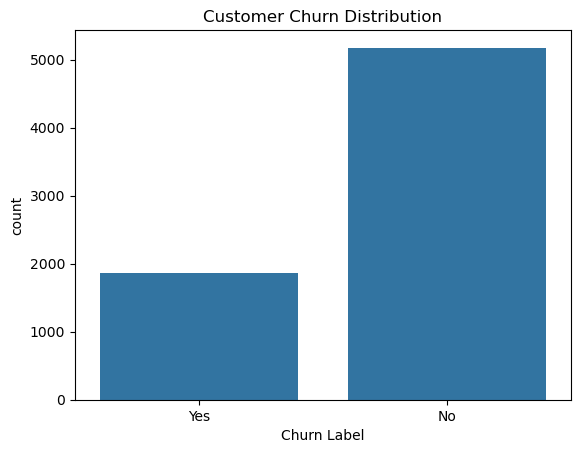

In [22]:
import matplotlib.pyplot as plt # Import visualization libraries
import seaborn as sns

sns.countplot(x='Churn Label', data=df) # Plot count of customers who churned vs. those who stayed
plt.title('Customer Churn Distribution') # Add a title to the plot 
plt.show() # Display The plot

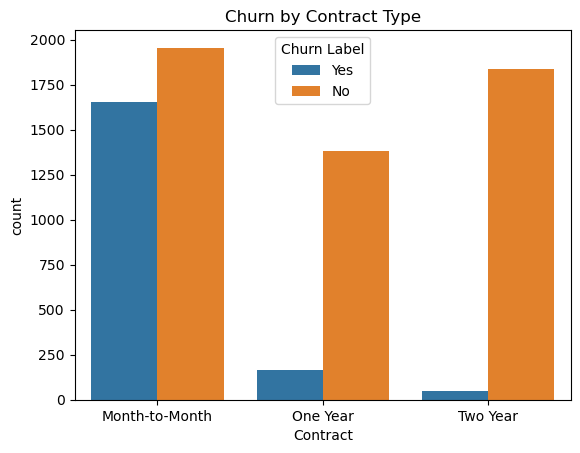

In [23]:
sns.countplot(x='Contract', hue='Churn Label', data=df)
plt.title('Churn by Contract Type')
plt.show()

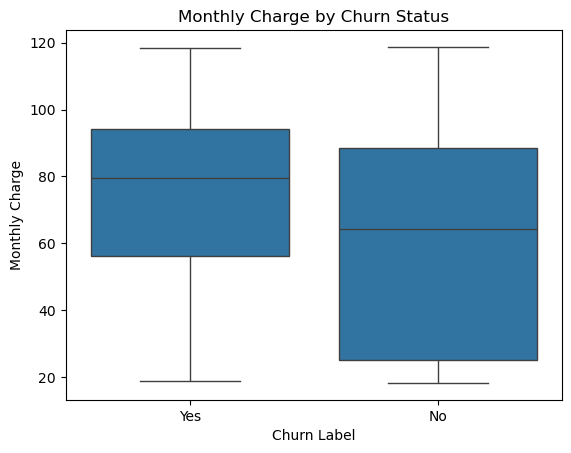

In [24]:
sns.boxplot(x='Churn Label', y='Monthly Charge', data=df)
plt.title('Monthly Charge by Churn Status')
plt.show()

In [25]:
features = [
    'Gender', 'Senior Citizen', 'Dependents', 'Phone Service', 
    'Internet Service', 'Contract', 'Paperless Billing',
    'Payment Method', 'Monthly Charge'
]

target = 'Churn Label'
# Select features (input variables) and target (output variable) for the model

In [26]:
X = df[features]
y = df[target]

In [27]:
X_encoded = pd.get_dummies(X, drop_first=True) 
# Convert categorical features to numeric with one-hot encoding for model compatibility

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42
)
# Split data: 70% training, 30% testing; random_state ensures reproducibility

In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000) # Initialize logistic regression model with max iterations set to 1000  

In [30]:
model.fit(X_train, y_train)  # Train the model on training data

LogisticRegression(max_iter=1000)

In [31]:
y_pred = model.predict(X_test) # Predict churn labels for the test data

In [32]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred)) # Overall accuracy of the model
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred)) # True vs predicted labels matrix  
print("\nClassification Report:\n", classification_report(y_test, y_pred)) # Precision, recall, F1-score metrics

Accuracy: 0.8121154756270705

Confusion Matrix:
 [[1339  185]
 [ 212  377]]

Classification Report:
               precision    recall  f1-score   support

          No       0.86      0.88      0.87      1524
         Yes       0.67      0.64      0.66       589

    accuracy                           0.81      2113
   macro avg       0.77      0.76      0.76      2113
weighted avg       0.81      0.81      0.81      2113

